In [1]:
library(fields)
library(rasterImage)

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-4 (2018-04-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:fields’:

    color.scale



List of files 

In [2]:
files<-c('~/Desktop/out053018/1.rda','~/Desktop/out053018/2.rda','~/Desktop/out053018/3.rda','~/Desktop/out053018/4.rda','~/Desktop/out053018/5.rda','~/Desktop/out053018/6.rda','~/Desktop/out053018/8.rda','~/Desktop/out053018/9.rda','~/Desktop/out053018/10.rda','~/Desktop/out053018/11.rda')

In [3]:
N<-c()
for (i in files) {
    
    load(i)
    N <- append(N,nclsot)
    
}

In [18]:
N_arc <- N
N <- simplify2array(N)
N_av <- matrix(data=NA,nrow=17,ncol=25)
for (j in 1:25) {
    for (i in 1:17) {

        N_av[i,j] <- mean(N[i,seq(1,250,25)+(j-1)])

    }
}

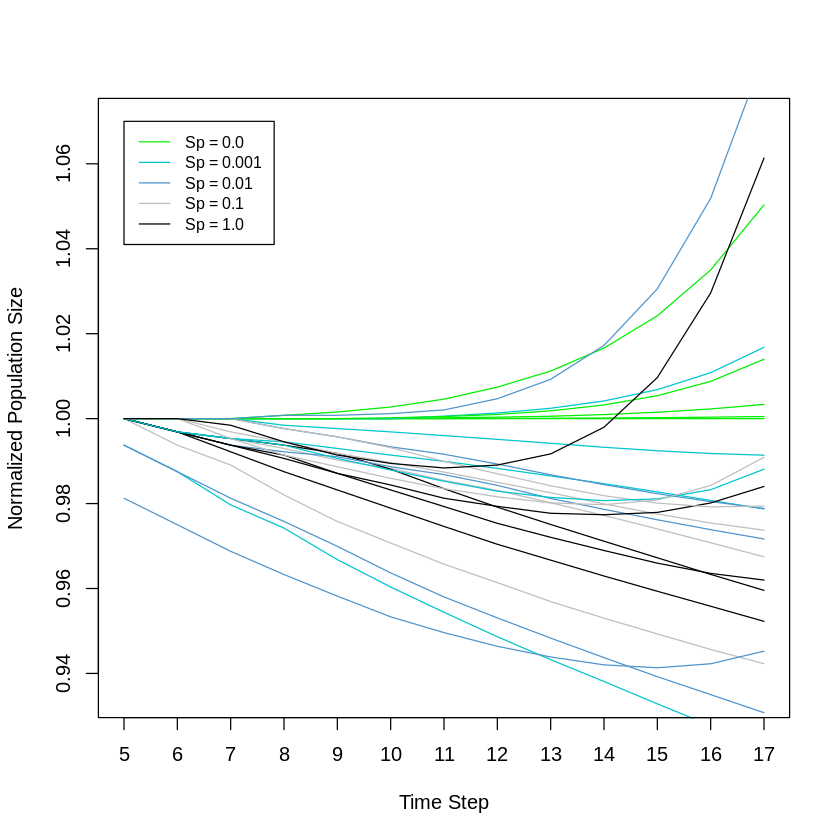

In [20]:
# pdf('test2.pdf')
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(N_av[,1],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.07),xaxt='n',ylab='Normalized Population Size',xlab='Time Step')
# plot(tail(nclsot[[1]],n=13))
cols = c(rep(colscheme,5))
for (i in 1:25) {
    lines(tail(N_av[,i],n=13)/(2^c(4:16)),col=cols[i],xaxt='n')
}
axis(1, at = seq(1,13,1),labels=seq(5,17,1))
legend(1, 1.07, legend=c("Sp = 0.0", "Sp = 0.001", "Sp = 0.01", "Sp = 0.1", "Sp = 1.0"),
       col=c("green2","turquoise3","steelblue3","grey","black"), lty=1, cex=0.8)
# dev.off()

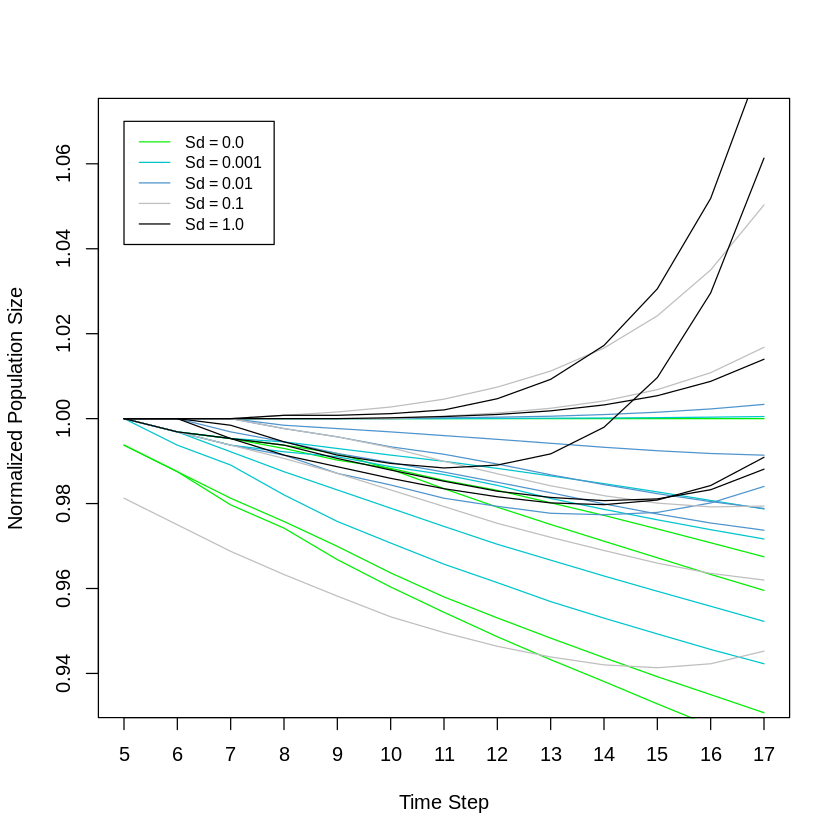

In [21]:
# pdf('test2.pdf')
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(N_av[,1],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.07),xaxt='n',ylab='Normalized Population Size',xlab='Time Step')
# plot(tail(nclsot[[1]],n=13))
# cols = c(rep(colscheme,5))
cols = c(rep("green2",5),rep("turquoise3",5),rep("steelblue3",5),rep("grey",5),rep("black",5))

for (i in 1:25) {
    lines(tail(N_av[,i],n=13)/(2^c(4:16)),col=cols[i],xaxt='n')
}
axis(1, at = seq(1,13,1),labels=seq(5,17,1))
legend(1, 1.07, legend=c("Sd = 0.0", "Sd = 0.001", "Sd = 0.01", "Sd = 0.1", "Sd = 1.0"),
       col=c("green2","turquoise3","steelblue3","grey","black"), lty=1, cex=0.8)
# dev.off()

In [26]:
Nt<-c()
for (i in files) {
    
    load(i)
    Nt <- append(Nt,nclst)
    
}

In [28]:
Nt <- matrix(Nt,nrow=10,ncol=25,byrow=TRUE)

In [29]:
Ntav <- c()
for (i in 1:25) {
    Ntav[i] <- mean(unlist(Nt[,i]))
}

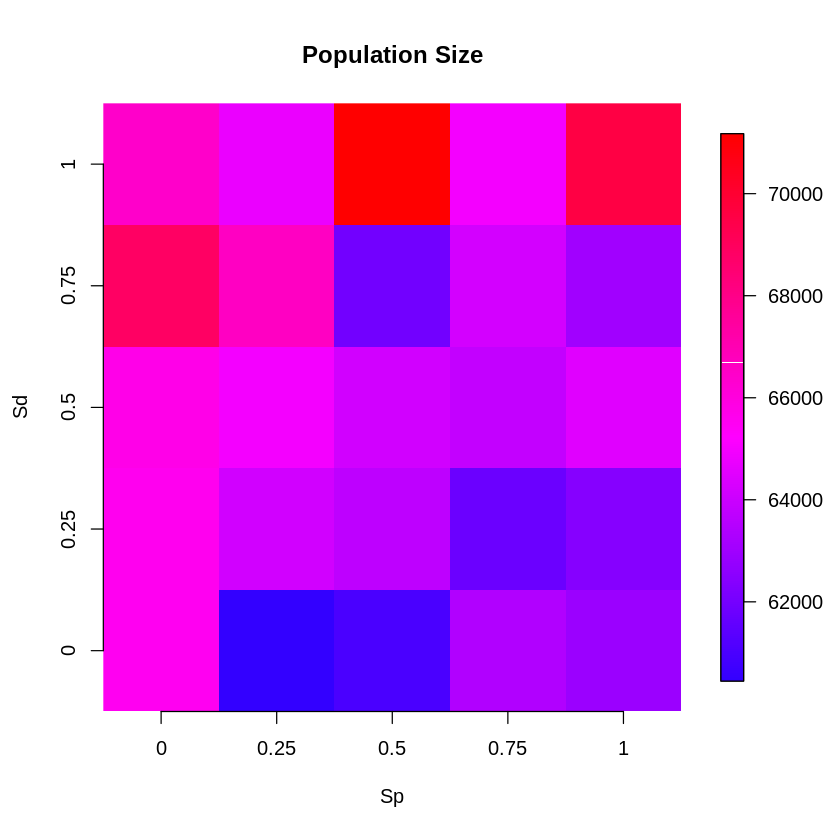

In [34]:
# pdf('rasterPopSize.pdf')
rotate <- function(x) t(apply(x, 2, rev))
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)
image.plot(rotate(apply(matrix(Ntav[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F,col=cols)

title(main="Population Size",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.25,0.5,0.75,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.25,0.5,0.75,1.0)); 
# dev.off()